# EDA
In this notebook,I do some EDA on the two subreddits

### Import things

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
history = pd.read_csv('./CSVs/history.csv')

In [3]:
world_news = pd.read_csv('./CSVs/world_news.csv')

In [4]:
history = history.drop('selftext', axis=1)

In [5]:
world_news = world_news.drop('selftext', axis=1)

### Make the y variable

In [6]:
world_news['is_world_news'] = 1

In [7]:
history['is_world_news'] = 0

In [8]:
history

,subreddit,title,is_world_news
0,history,buy facebook reviews - usa facebook page posit...,0
1,history,why is it that in the religious texts of the a...,0
2,history,what happened to all the corpses of the tens o...,0
3,history,why are there so few lipka tatars in todays po...,0
4,history,buy facebook reviews - usa facebook page posit...,0
...,...,...,...
10469,history,just found my new favorite model check out lit...,0
10470,history,i am interested in learning world history coul...,0
10471,history,are east asian people descendants of ancient e...,0
10472,history,40000-year-old bone reveals east asias ancient...,0


In [9]:
world_news

,subreddit,title,is_world_news
0,worldnews,staggering photos capture a frozen apartment c...,1
1,worldnews,dow jones closes down 3000 points or almost 13...,1
2,worldnews,stocks making the biggest moves in the premark...,1
3,worldnews,,1
4,worldnews,sothebys auction house is getting into the nft...,1
...,...,...,...
10129,worldnews,ghana supreme court affirms president akufo-ad...,1
10130,worldnews,ford ikon old petrol car battery,1
10131,worldnews,why covid-19 vaccine passports could be pandor...,1
10132,worldnews,south koreas first transgender soldier found dead,1


### Combine the two subreddits into a dataframe

In [10]:
df = pd.concat([world_news, history])

In [11]:
df

,subreddit,title,is_world_news
0,worldnews,staggering photos capture a frozen apartment c...,1
1,worldnews,dow jones closes down 3000 points or almost 13...,1
2,worldnews,stocks making the biggest moves in the premark...,1
3,worldnews,,1
4,worldnews,sothebys auction house is getting into the nft...,1
...,...,...,...
10469,history,just found my new favorite model check out lit...,0
10470,history,i am interested in learning world history coul...,0
10471,history,are east asian people descendants of ancient e...,0
10472,history,40000-year-old bone reveals east asias ancient...,0


### Feature engineering

In [12]:
df['title'] = df['title'].astype(str)

In [13]:
df['title_len'] = df['title'].map(lambda x: len(x))

In [14]:
df['title_wordcount'] = df['title'].map(lambda x: len(x.split()))

In [15]:
df.sort_values(by='title_wordcount')

,subreddit,title,is_world_news,title_len,title_wordcount
3590,worldnews,,1,5,0
4550,history,,0,1,0
9057,worldnews,...,1,60,0
8487,worldnews,,1,7,0
3390,worldnews,,1,8,0
...,...,...,...,...,...
1159,history,i lost my job due to covid i created a channel...,0,269,58
6644,history,i made a 1028 doc on the history of minnesotas...,0,292,58
7295,history,in this video i go over a new strategy for how...,0,295,58
8750,history,celtics opi have a theory on why celts are so ...,0,295,58


### Get rid of any titles with word length less than 5 because they don't contain any useful information

In [16]:
# view what kind of posts have titles with less than five words:
df[df['title_wordcount'] <= 5]

,subreddit,title,is_world_news,title_len,title_wordcount
3,worldnews,,1,10,0
5,worldnews,38,1,15,1
33,worldnews,pregame y combinator with equity,1,32,5
36,worldnews,daily cartoon wednesday march 17th,1,34,5
42,worldnews,swipestrike daily 17-03-2021,1,28,3
...,...,...,...,...,...
10431,history,click my link,0,13,3
10459,history,sun-protection in history,0,25,3
10461,history,buy facebook friend request,0,27,4
10462,history,who invented the newspaper,0,26,4


In [17]:
df = df[df['title_wordcount'] >= 5]

### Visualizing differences between subreddits

Text(0, 0.5, '# words')

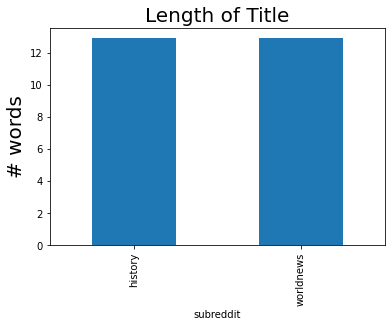

In [18]:
df.groupby('subreddit').mean()['title_wordcount'].plot(kind='bar')
plt.title('Length of Title', size=20)
plt.ylabel('# words', size=20)

The lengths of titles seem to be similar, which is good. So you can't just choose a subreddit based off of length.

### Using CountVectorizer

In [19]:
cv = CountVectorizer(stop_words='english')
vectorized = pd.DataFrame(cv.fit_transform(df['title']).todense(), columns=cv.get_feature_names())

Text(0.5, 1.0, 'Most Frequent Words - Both Subreddits')

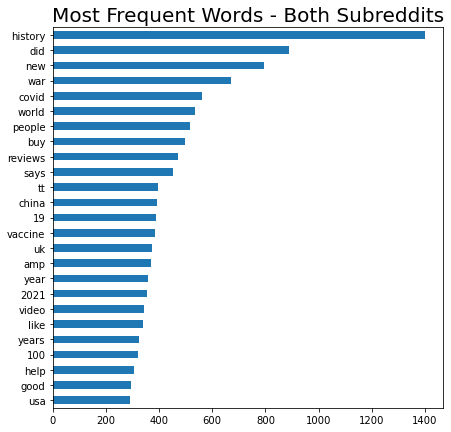

In [20]:
plt.figure(figsize=[7,7])
freq=vectorized.sum().sort_values(ascending=False).head(25)
freq.sort_values().plot(kind='barh')
plt.title('Most Frequent Words - Both Subreddits', size=20)

In [21]:
world_news['title'].isnull().sum()

0

In [22]:
world_news_cv = pd.DataFrame(cv.fit_transform(world_news['title']).todense(), columns=cv.get_feature_names())
history_cv = pd.DataFrame(cv.fit_transform(history['title']).todense(), columns=cv.get_feature_names())

Text(0.5, 1.0, 'Most Frequent Words - r/worldnews')

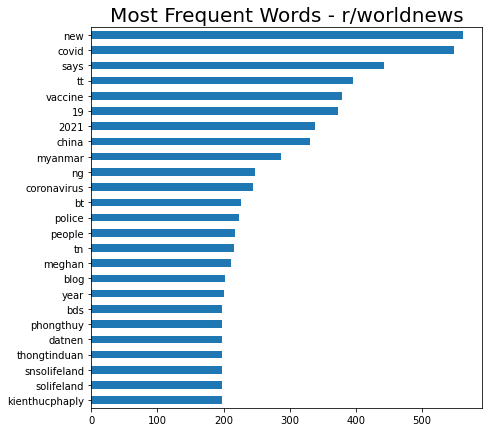

In [23]:
plt.figure(figsize=[7,7])
freq= world_news_cv.sum().sort_values(ascending=False).head(25)
freq.sort_values().plot(kind='barh')
plt.title('Most Frequent Words - r/worldnews', size = 20)

Text(0.5, 1.0, 'Most Frequent Words - r/history')

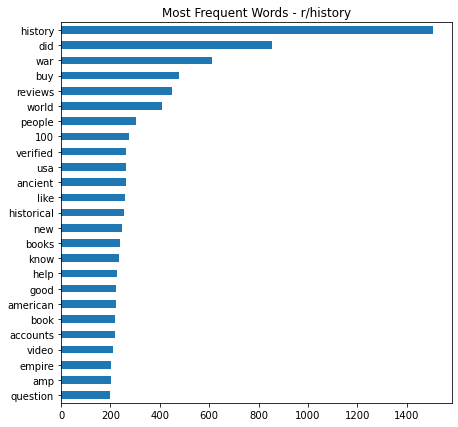

In [24]:
plt.figure(figsize=[7,7])
freq = history_cv.sum().sort_values(ascending=False).head(25)
freq.sort_values().plot(kind='barh')
plt.title('Most Frequent Words - r/history')

The word history is mentioned over 1400 times in r/history, 
but it is not a top word in r/worldnews so that would be a giveaway so I'll just delete the word.

In [25]:
history['title'] = history['title'].map(lambda x: ''.join(x.split(' history')))

In [26]:
history_cv = pd.DataFrame(cv.fit_transform(history['title']).todense(), columns=cv.get_feature_names())

Text(0.5, 1.0, 'Most Frequent Words - r/history')

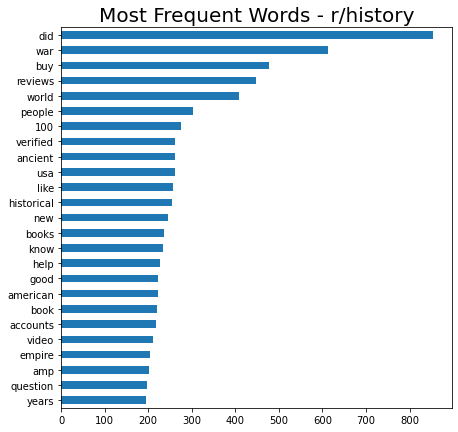

In [27]:
plt.figure(figsize=[7,7])
freq=history_cv.sum().sort_values(ascending=False).head(25)
freq.sort_values().plot(kind='barh')
plt.title('Most Frequent Words - r/history', size=20)

In [28]:
#get rid of the word history in the df as well:
df['title'] = df['title'].map(lambda x: ''.join(x.split(' history')))

<ipython-input-28-78ed84c95746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].map(lambda x: ''.join(x.split(' history')))


In [29]:
cv = CountVectorizer(stop_words='english')
vectorized = pd.DataFrame(cv.fit_transform(df['title']).todense(), columns=cv.get_feature_names())

Text(0.5, 1.0, 'Most Frequent Words - Both Subreddits')

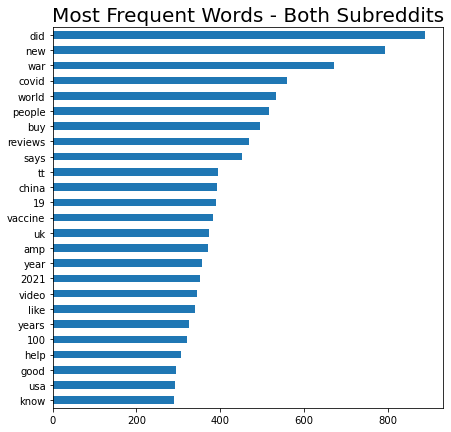

In [30]:
plt.figure(figsize=[7,7])
freq=vectorized.sum().sort_values(ascending=False).head(25)
freq.sort_values().plot(kind='barh')
plt.title('Most Frequent Words - Both Subreddits', size=20)

### Which most common words are the same between subreddits?

In [31]:
history_common = history_cv.sum().sort_values(ascending=False).head(25).index.to_list()

In [32]:
world_news_common = world_news_cv.sum().sort_values(ascending=False).head(25).index.to_list()

In [33]:
list(set(history_common)& set(world_news_common))

['people', 'new']

It appears that the words are different enough between the two subreddits so that my model will be able differentiate posts between the two.

### Save df for training

In [34]:
df.to_csv('./CSVs/training.csv', index=False)